# Machine Vision Lab 7
> Name - Ojas Patil
>
> Register Number - 21BAI1106

## Step 1: Segmenting and Identifying the Apple

In [23]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from scipy.spatial.distance import euclidean
from skimage.color import rgb2gray

Load and Display the Image

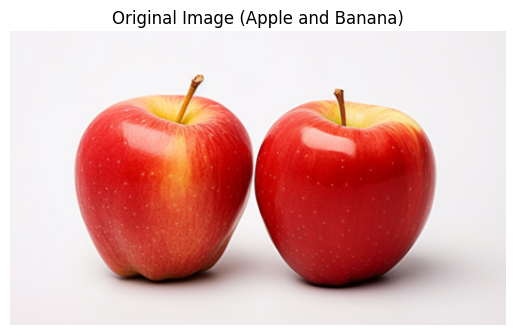

In [24]:
# Load and display the image (contains apple and banana)
image = cv2.imread('/content/a2.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
apple_image_resized = cv2.resize(image, (512, 512))

plt.imshow(image_rgb)
plt.title('Original Image (Apple and Banana)')
plt.axis('off')
plt.show()


Segment the Image Using Thresholding

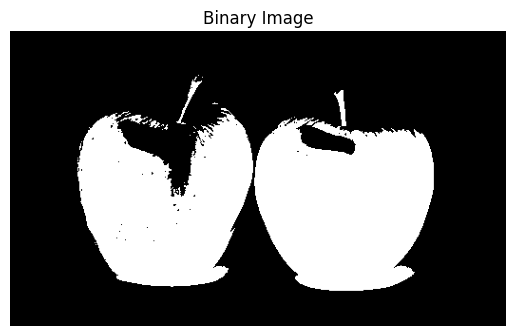

In [25]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 140, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

## Step 2: Extract Features from the Reference Apple

In [26]:
# Load the reference image of the apple
apple_image = cv2.imread('/content/a1.png')
gray_apple = cv2.cvtColor(apple_image, cv2.COLOR_BGR2GRAY)
apple_image_resized = cv2.resize(apple_image, (512, 512))

# Segment the apple using thresholding
_, apple_binary = cv2.threshold(gray_apple, 200, 255, cv2.THRESH_BINARY_INV)

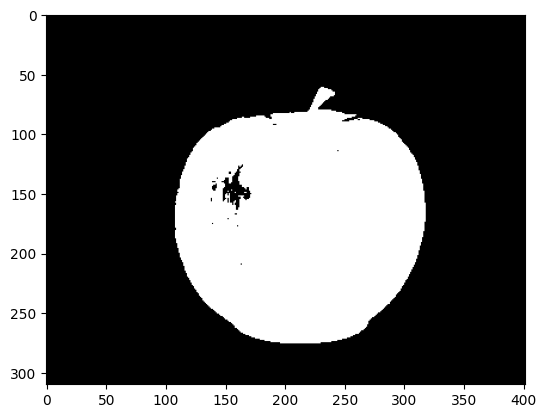

In [27]:
plt.imshow(apple_binary, cmap='gray')

 Finding contours and extracting features for the referenced apple

In [28]:
apple_contour, _ = cv2.findContours(apple_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
apple_contour = apple_contour[0]  # Assuming one contour for the apple

In [29]:
apple_area = cv2.contourArea(apple_contour)
apple_perimeter = cv2.arcLength(apple_contour, True)
x, y, w, h = cv2.boundingRect(apple_contour)
apple_centroid = (x + w // 2, y + h // 2)

In [30]:
# Extract texture using Local Binary Pattern (LBP)
apple_lbp = local_binary_pattern(gray_apple[y:y+h, x:x+w], 8, 1, method='uniform')

# Extract average color from the apple
apple_color_mean = np.mean(apple_image[y:y+h, x:x+w], axis=(0, 1))

## Detect and Compare with Target Objects

Calculate the contours

In [31]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Similarity Measures using Histogram Comparison

In [32]:
def histogram_diff(hist1, hist2):
    return euclidean(np.histogram(hist1, bins=256)[0], np.histogram(hist2, bins=256)[0])

In [33]:
apple_matches = []

# Loop over each contour to detect apples
for idx, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    x, y, w, h = cv2.boundingRect(contour)
    target_lbp = local_binary_pattern(gray_image[y:y+h, x:x+w], 8, 1, method='uniform')
    target_color_mean = np.mean(image_rgb[y:y+h, x:x+w], axis=(0, 1))

    # Compare features with the reference apple
    area_diff = abs(area - apple_area)
    perimeter_diff = abs(perimeter - apple_perimeter)
    lbp_diff = histogram_diff(apple_lbp, target_lbp)
    color_diff = np.linalg.norm(target_color_mean - apple_color_mean)

    # Apply thresholds: If the differences are big enough, classify the object as an apple
    if area_diff < 500000 and perimeter_diff < 500 and lbp_diff < 500000 and color_diff < 5000:
        apple_matches.append((x, y, w, h))

##  Highlight and Label the Detected Apple

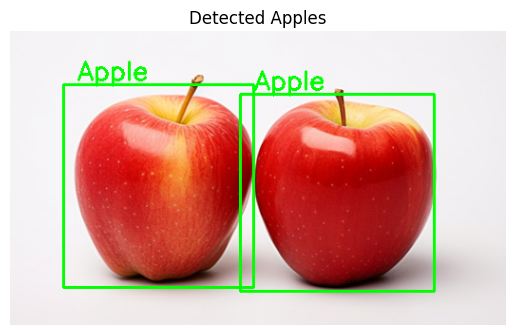

In [34]:
# Draw bounding boxes around detected apples
output_image = image_rgb.copy()

for (x, y, w, h) in apple_matches:
    cv2.rectangle(output_image, (x-15, y-25), (x+w, y+h), (0, 255, 0), 2)  # Green for apple
    cv2.putText(output_image, "Apple", (x, y-30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(output_image)
plt.title('Detected Apples')
plt.axis('off')
plt.show()